<a href="https://colab.research.google.com/github/Gold-gish/goldfish/blob/master/CGAN2ndDeepFeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_53 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_67 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_______________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[2]
0.6928815841674805
0.68504924
[2]
0.26390478014945984
2.1149378
[2]
0.5143096446990967
2.1099737
[2]
0.577876091003418
1.6837506
[2]
0.6334555149078369
1.4891893
[2]
0.6068110466003418
1.5437896
[2]
0.6020084619522095
1.3591608
[2]
0.6029950380325317
1.2827666
[2]
0.6753694415092468
1.3198879
[2]
0.6213589906692505
1.3260906
[2]
0.6634403467178345
1.3191948
[2]
0.6295307278633118
1.3711272
[2]
0.6220901012420654
1.1849676
[2]
0.6463512778282166
1.379091
[2]
0.6681111454963684
1.218629
[2]
0.6144486665725708
1.3989488
[2]
0.6204807758331299
1.4399793
[2]
0.6069657802581787
1.3726972
[2]
0.6747349500656128
1.2598548


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[2]
0.65046626329422
1.2104615
[2]
0.6358687877655029
1.4558413
[2]
0.6326607465744019
1.371042
[2]
0.6450315713882446
1.3334379
[2]
0.6106166839599609
1.3496313
[2]
0.6490235328674316
1.4056594
[2]
0.6447186470031738
1.3441169
[2]
0.652141809463501
1.570548
[2]
0.6131117343902588
1.2697237
[2]
0.6468677520751953
1.3810086
[2]
0.6207305788993835
1.1641936
[2]
0.6517195701599121
1.4547628
[2]
0.6198660731315613
1.8010505
[2]
0.6449743509292603
1.2347957
[2]
0.6306633353233337
1.6501381
[2]
0.6314151287078857
1.3025302
[2]
0.6244982481002808
1.643563
[2]
0.7010079622268677
0.72284555
[2]
0.6960201859474182
0.71718264
[2]
0.6930334568023682
0.7193482
[2]
0.6924300789833069
0.7156715


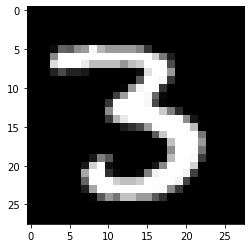

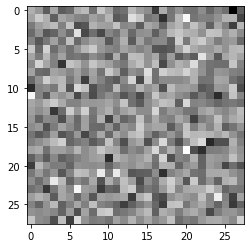

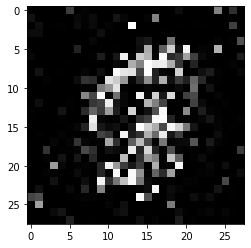

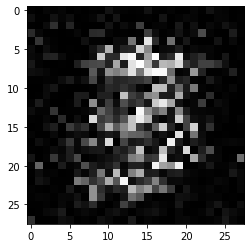

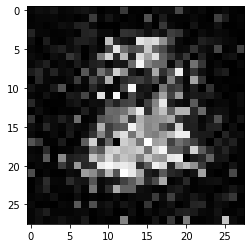

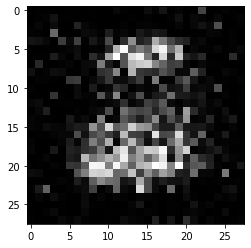

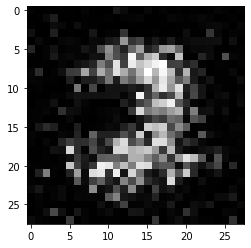

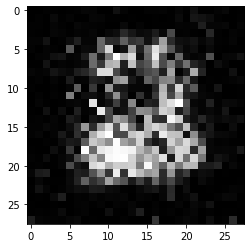

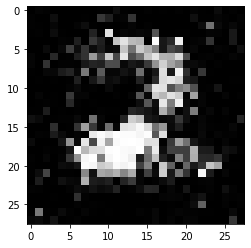

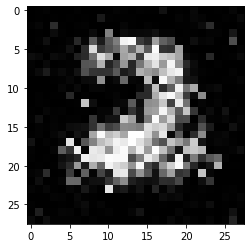

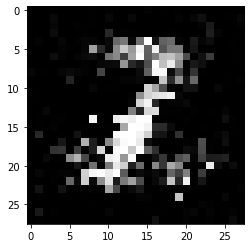

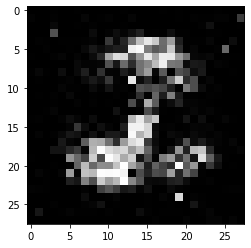

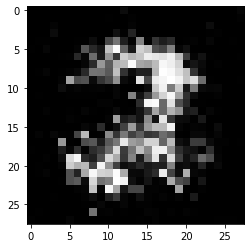

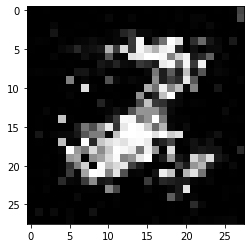

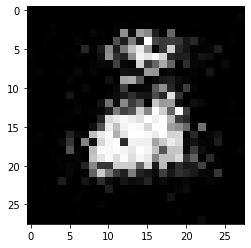

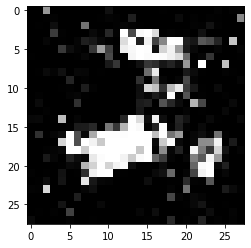

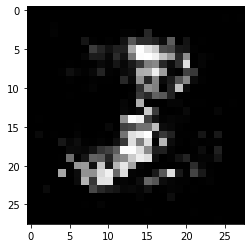

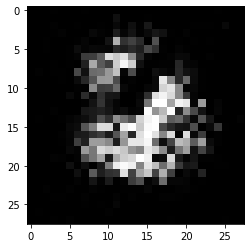

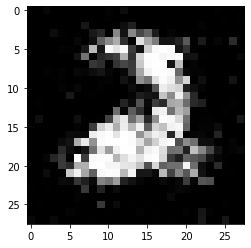

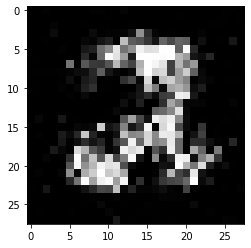

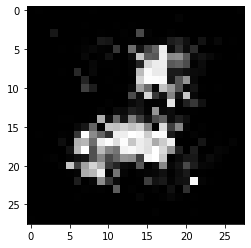

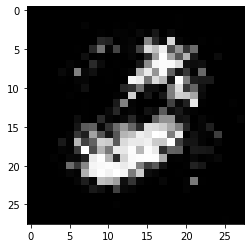

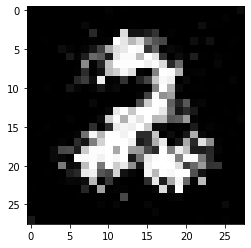

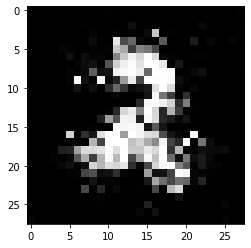

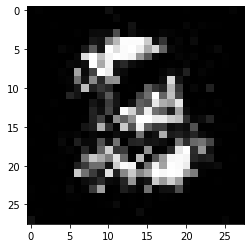

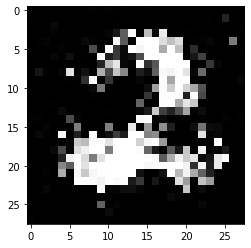

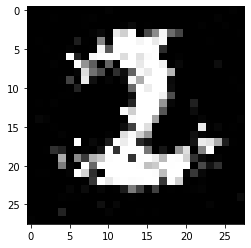

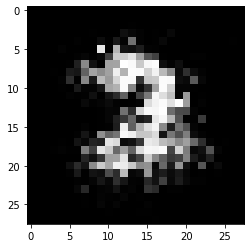

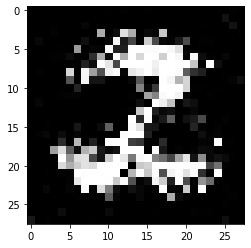

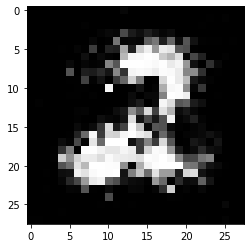

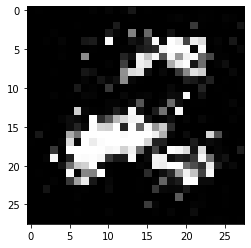

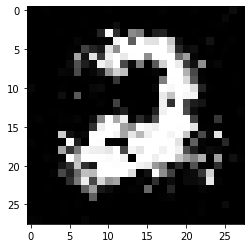

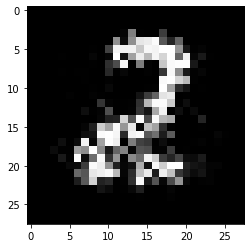

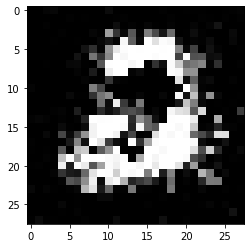

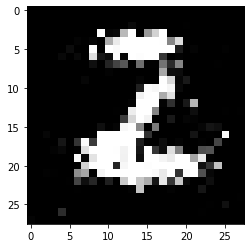

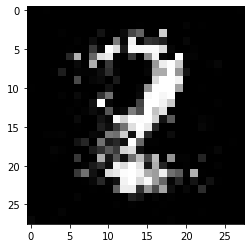

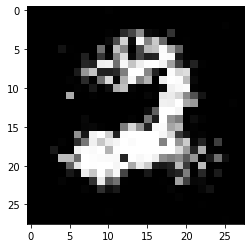

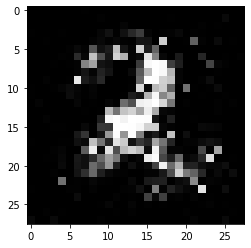

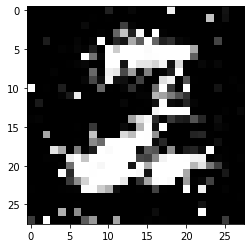

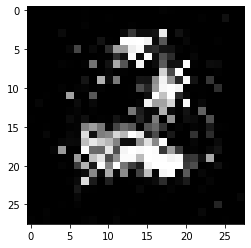

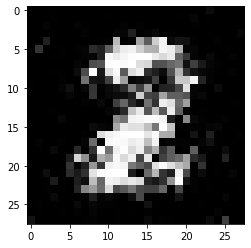

In [14]:
%tensorflow_version 2.x
import time
from keras import backend as K

from keras.layers import Input, Dense, Reshape, Flatten, Concatenate
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

%matplotlib inline


class DCGAN():
  def __init__(self):
    (self.realimages,self.realimagesLabels),(_,_) = tf.keras.datasets.mnist.load_data()
    plt.imshow(self.realimages[12], 'gray')
    self.realimages = (self.realimages-127.5)/127.5
    #self.realimages = np.expand_dims(self.realimages,axis=3)
    print(self.realimages.shape)

  

    self.discriminator = self.discriminatorBuilder()
    self.discriminator.compile(loss='binary_crossentropy' , optimizer= Adam(0.0002,0.5))

    self.generator = self.generatorBuilder()

    genInp   = Input(shape=(100,))
    genLable = Input(shape=(1,))
    genOut = self.generator([genInp, genLable])
    
    self.discriminator.trainable = False
    
    discOut = self.discriminator([genOut, genLable])

    self.generatorTrainerGan = Model([genInp, genLable], discOut)
    self.generatorTrainerGan.compile(loss='binary_crossentropy' , optimizer=Adam(0.0002,0.5)) #note "optimizer!=)) optimizers"


  def generatorBuilder(self):
    model = Sequential()
    model.add(Dense(256, input_shape=(100,  )))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28, activation='tanh'))
    model.add(Reshape((28,28)))
    model.summary()
    noise = Input(shape=(100, ))


    label = Input(shape=(1,), dtype='int32')

    label_embedding = Embedding(10, 100, input_length=1)(label)
    label_embedding = Flatten()(label_embedding)
    model_input = multiply([noise, label_embedding])
    img = model(model_input)

    return Model([noise, label], img)




  def discriminatorBuilder(self):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()


    image = Input((28,28))
    label = Input((1, ), dtype='int32')
    label_embedding = Embedding(10, 28*28)(label)
    label_embedding = Flatten() (label_embedding)
    flat_img = Flatten()(image)
    model_input = multiply([flat_img, label_embedding])


    output = model(model_input)
    return Model([image, label], output)



  def train(self,epochs,batchsize):
    realDiscOut = np.ones((batchsize,1))
    fakeDiscOut = np.zeros((batchsize,1))

    d_loss = []
    g_loss = []

    for epoch in range(epochs):
      randIndx = np.random.randint(0, self.realimages.shape[0], batchsize)
      randRealimages, labels = self.realimages[randIndx], self.realimagesLabels[randIndx]


      noise = np.random.normal(0, 1, (batchsize, 100))
      generatorOut = self.generator.predict([noise, labels])

      discriminatorLossReal = self.discriminator.train_on_batch([randRealimages, labels], realDiscOut)
      discriminatorLossFake = self.discriminator.train_on_batch([generatorOut, labels]  , fakeDiscOut)
      discriminatorLoss = 0.5* np.add(discriminatorLossFake, discriminatorLossReal)


      
      sampled_labels = np.random.randint(0, 10, batchsize).reshape(-1, 1)


      generatorLoss = self.generatorTrainerGan.train_on_batch([noise, sampled_labels], realDiscOut)
      if (epoch % 100 == 0):
        plt.figure()
        noise = np.random.normal(0, 1, (1, 100))
        #print(sampled_labels)
        
        #c = np.random.randint(0, high=10, size=1)
        c = np.array([2])
        print (c)
        print(discriminatorLoss)
        print(generatorLoss)
        plt.imshow(tf.reshape(self.generator.predict([noise, c]), shape=(28, 28)), cmap='gray')


if __name__ == "__main__":
  dcganclass = DCGAN()
  dcganclass.train(4000,128)



